# Disclaimer
Directly taken from a deleted blog post by Nicholas Jackson
https://web.archive.org/web/20190708011555/http://nicholasjjackson.com/2012/03/08/sample-size-is-10-a-magic-number/

I thought the idea was interesting, and wanted to preserve it.

# Why 10 is a Magic Number for Minimum appropriate sample size

     n     perci
0    1       NaN
1    2  0.292893
2    3  0.183503
3    4  0.133975
4    5  0.105573
5    6  0.087129
6    7  0.074180
7    8  0.064586
8    9  0.057191
9   10  0.051317
10  11  0.046537
11  12  0.042573
12  13  0.039231
13  14  0.036376
14  15  0.033908
15  16  0.031754
16  17  0.029857
17  18  0.028175
18  19  0.026671
19  20  0.025321


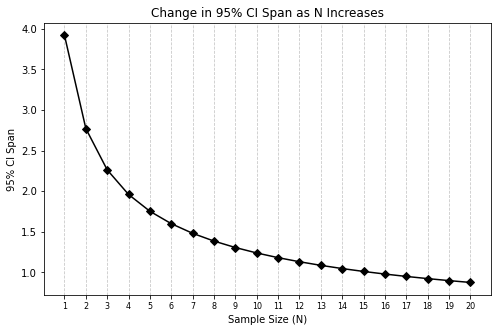

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Generate Data
n = np.arange(1, 21)
sd = 1
se = sd / np.sqrt(n)  # Standard error
ci = 2 * 1.96 * se  # Confidence Interval Span

# Step 2: Compute Percentage Change in CI Span
ci_lag = np.insert(ci[:-1], 0, np.nan)  # Shifted CI values (lag)
perci = np.abs((ci - ci_lag) / ci_lag)  # Percentage change
perci[0] = np.nan  # First value has no previous CI to compare

# Step 3: Convert to DataFrame for easy listing
df = pd.DataFrame({"n": n, "perci": perci})
print(df)

# Step 4: Plot the Graph
plt.figure(figsize=(8, 5))
plt.plot(n, ci, marker="D", linestyle="-", color="black") 
plt.xlabel("Sample Size (N)")
plt.ylabel("95% CI Span")
plt.title("Change in 95% CI Span as N Increases")
plt.xticks(n, fontsize=8)
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

## Conclusion
While conducting proper power analyses and sample size estimations is undoubtedly important, choosing an N of 10 is not arbitrary. 

Instead, it strikes a balance between the effort required for additional data collection and the ability to detect significant effects—assuming a normal distribution.

## References
- Nicholas Jackson's blog post on sample sizes: https://web.archive.org/web/20190708011555/http://nicholasjjackson.com/2012/03/08/sample-size-is-10-a-magic-number/